<a href="https://colab.research.google.com/github/srivamsikakarla/venkatasuryasatya_INFO5731_Fall2023/blob/main/kakarla_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:

import gensim
from gensim import corpora


documents = [
    ["Food", "Legumes", "Grains", "Proteins"],  # Document 1
    ["English", "Kiswahili", "Geography", "Science"],  # Document 2
    # Add more documents as needed
]



dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Choosing the number of topics based on coherence score
from gensim.models import CoherenceModel

coherence_scores = []
for k in range(2, 11):
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary, passes=2, workers=2)
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))

best_k = max(coherence_scores, key=lambda x: x[1])[0]

# Training the LDA model with the chosen number of topics
lda_model = gensim.models.LdaMulticore(corpus, num_topics=best_k, id2word=dictionary, passes=2, workers=2)

# Summarizing the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)





(0, '0.125*"Science" + 0.125*"Grains" + 0.125*"Food" + 0.125*"Proteins" + 0.125*"English" + 0.125*"Legumes" + 0.125*"Kiswahili" + 0.125*"Geography"')
(1, '0.225*"Legumes" + 0.225*"Food" + 0.225*"Proteins" + 0.225*"Grains" + 0.025*"Science" + 0.025*"English" + 0.025*"Geography" + 0.025*"Kiswahili"')
(2, '0.125*"Science" + 0.125*"Grains" + 0.125*"English" + 0.125*"Food" + 0.125*"Geography" + 0.125*"Kiswahili" + 0.125*"Proteins" + 0.125*"Legumes"')
(3, '0.125*"Science" + 0.125*"Proteins" + 0.125*"Grains" + 0.125*"English" + 0.125*"Geography" + 0.125*"Legumes" + 0.125*"Food" + 0.125*"Kiswahili"')
(4, '0.125*"Grains" + 0.125*"Science" + 0.125*"Proteins" + 0.125*"Food" + 0.125*"Legumes" + 0.125*"Geography" + 0.125*"English" + 0.125*"Kiswahili"')
(5, '0.225*"Kiswahili" + 0.225*"Geography" + 0.225*"English" + 0.225*"Science" + 0.025*"Grains" + 0.025*"Proteins" + 0.025*"Legumes" + 0.025*"Food"')
(6, '0.125*"Proteins" + 0.125*"Kiswahili" + 0.125*"Science" + 0.125*"Grains" + 0.125*"English" + 0.1

In [ ]:
pip install pyLDAvis


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim
import pyLDAvis
import pyLDAvis.gensim
from gensim import corpora

ts
documents = [
    ["Food", "Legumes", "Grains", "Proteins"],  # Document 1
    ["English", "Kiswahili", "Geography", "Science"],  # Document 2
    # Add more documents as needed
]

# Creating a dictionary and corpus
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Choosing the number of topics based on coherence score
from gensim.models import CoherenceModel

coherence_scores = []
for k in range(2, 11):
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary, passes=2, workers=2)
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))

best_k = max(coherence_scores, key=lambda x: x[1])[0]

# Training the LDA model with the chosen number of topics
lda_model = gensim.models.LdaMulticore(corpus, num_topics=best_k, id2word=dictionary, passes=2, workers=2)

# Summarizing the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Visualizing the topics
data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data)


(0, '0.125*"Legumes" + 0.125*"English" + 0.125*"Proteins" + 0.125*"Kiswahili" + 0.125*"Grains" + 0.125*"Science" + 0.125*"Geography" + 0.125*"Food"')
(1, '0.125*"Grains" + 0.125*"Kiswahili" + 0.125*"Legumes" + 0.125*"Geography" + 0.125*"English" + 0.125*"Food" + 0.125*"Proteins" + 0.125*"Science"')
(2, '0.125*"Legumes" + 0.125*"Grains" + 0.125*"English" + 0.125*"Geography" + 0.125*"Kiswahili" + 0.125*"Food" + 0.125*"Proteins" + 0.125*"Science"')
(3, '0.219*"Science" + 0.219*"Geography" + 0.219*"Kiswahili" + 0.219*"English" + 0.031*"Legumes" + 0.031*"Grains" + 0.031*"Food" + 0.031*"Proteins"')
(4, '0.219*"Food" + 0.219*"Proteins" + 0.219*"Grains" + 0.219*"Legumes" + 0.031*"Geography" + 0.031*"English" + 0.031*"Kiswahili" + 0.031*"Science"')
(5, '0.125*"Legumes" + 0.125*"English" + 0.125*"Grains" + 0.125*"Kiswahili" + 0.125*"Proteins" + 0.125*"Science" + 0.125*"Geography" + 0.125*"Food"')


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


documents = [
    "this is the first document",
    "this document is the second document",
    "and this is the third one",
    "is this the first document",
]

# Creating a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)

# Choosing the number of topics based on coherence score
coherence_scores = []


for k in range(2, min(dtm.shape[1], 11)):
    svd = TruncatedSVD(n_components=k, random_state=42)
    topics = svd.fit_transform(dtm)
    similarity_matrix = np.dot(topics, topics.T)
    coherence_score = np.sum(similarity_matrix) - k
    coherence_scores.append((k, coherence_score))

best_k = max(coherence_scores, key=lambda x: x[1])[0]

# Applying LSA with the chosen number of topics
svd = TruncatedSVD(n_components=best_k, random_state=42)
topics = svd.fit_transform(dtm)

# Summarizing the topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(topics):
    top_terms = [terms[index] for index in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic {i + 1}: {', '.join(top_terms)}")


Topic 1: and, document
Topic 2: and, document
Topic 3: document, and
Topic 4: and, document


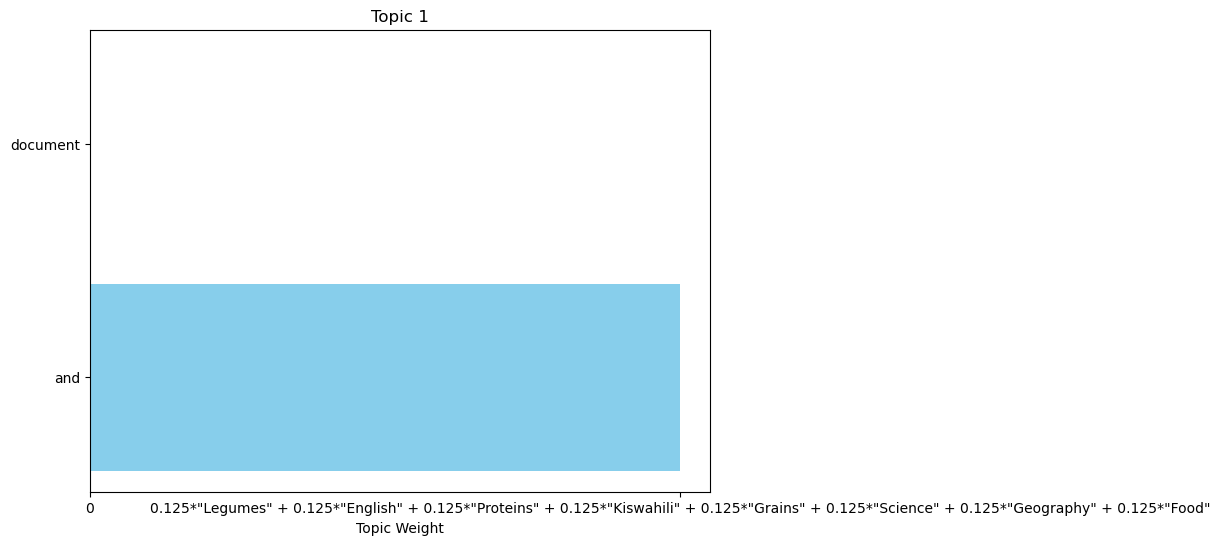

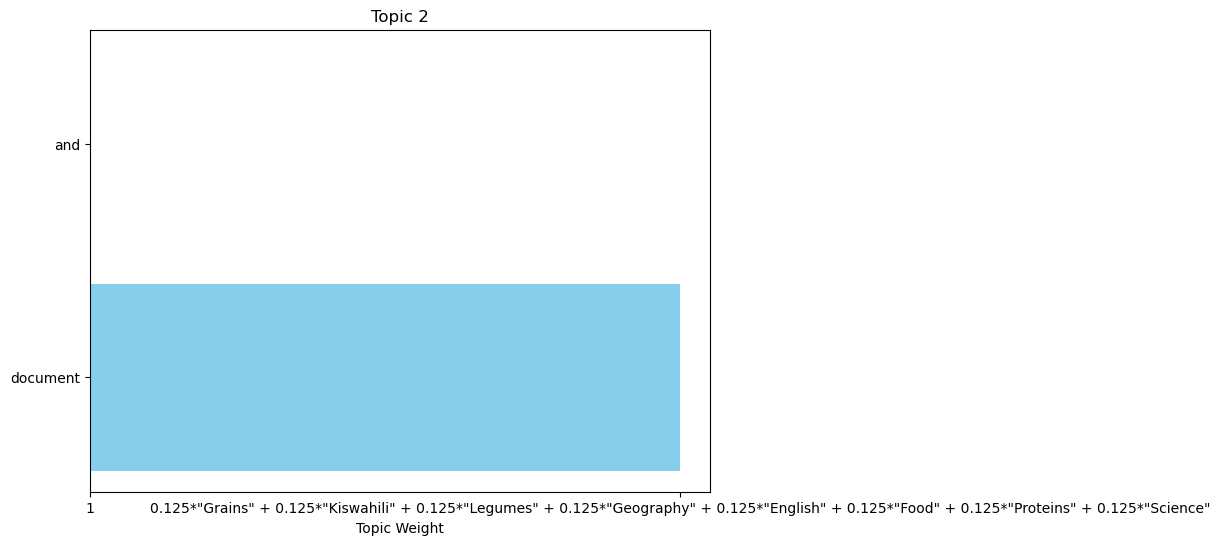

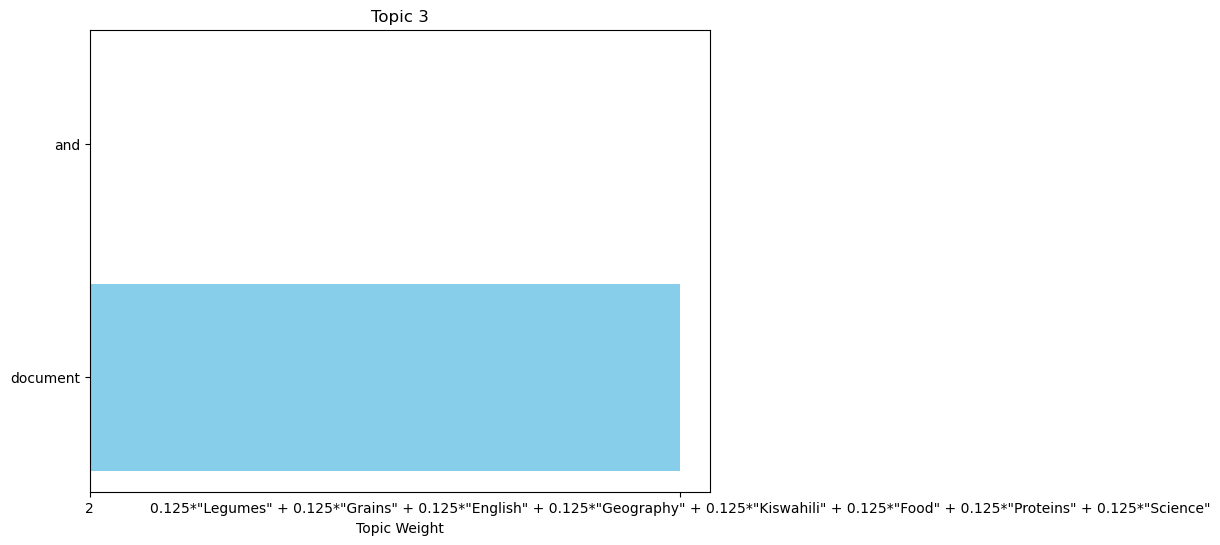

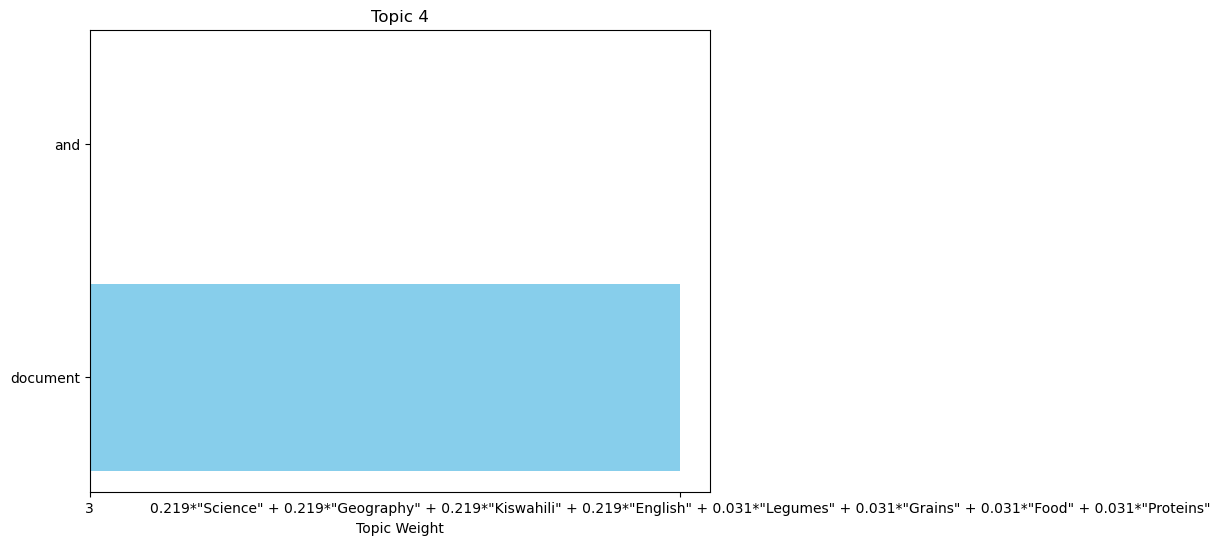

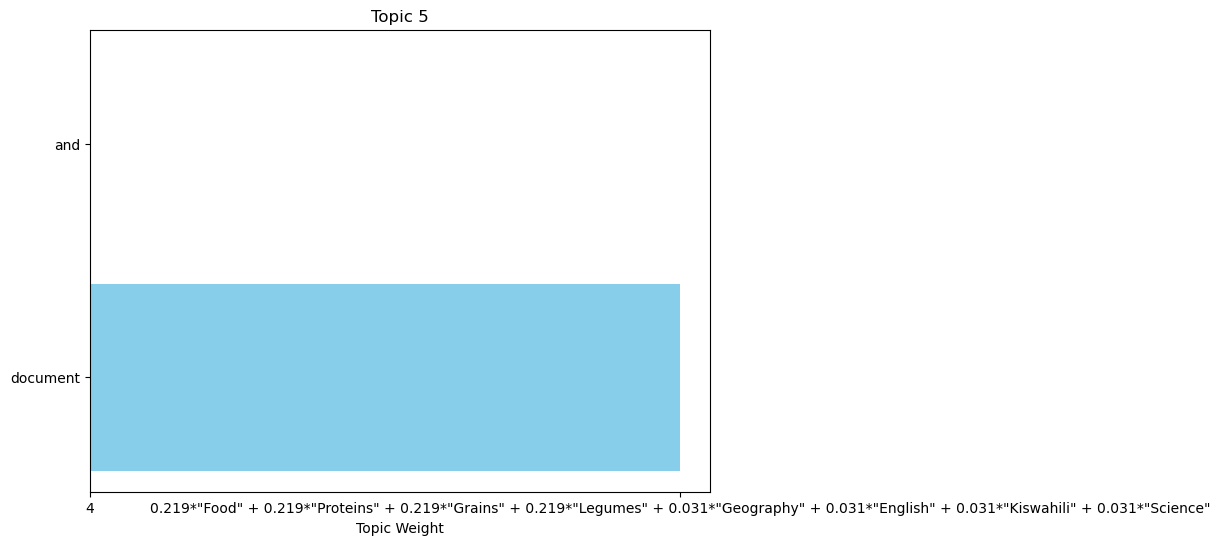

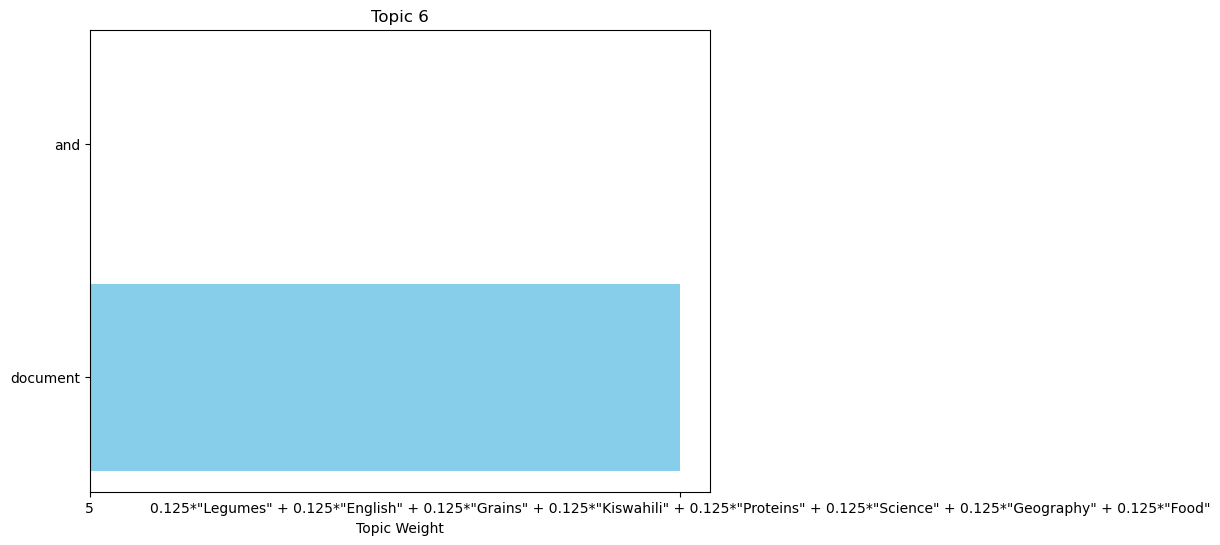

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


documents = [
    "this is the first document",
    "this document is the second document",
    "and this is the third one",
    "is this the first document",
]

# Creating a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)

# Summarizing the topics
terms = np.array(vectorizer.get_feature_names_out())

for i, topic in enumerate(topics):
    # Converting the tuple to a NumPy array and then get the top terms
    topic_array = np.array(topic)
    top_terms = terms[topic_array.argsort()[:-10 - 1:-1]]
    topic_label = f"Topic {i + 1}"

    # Creating a bar plot for the top terms
    plt.figure(figsize=(8, 6))
    plt.barh(top_terms, topic_array, color='skyblue')
    plt.xlabel('Topic Weight')
    plt.title(topic_label)
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability
    plt.show()



# (3) (10 points) Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:¶

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb


In [ ]:
# Installing the required libraries
!pip install lda2vec
!pip install tensorflow
!pip install Theano

# Importing necessary libraries
import numpy as np
import lda2vec


documents = [
    "this is the first document",
    "this document is the second document",
    "and this is the third one",
    "is this the first document",
]

# Tokenize and preprocess the documents
tokenized_documents = [doc.split() for doc in documents]

# Creating a vocabulary
vocab = {term: idx for idx, term in enumerate(set(term for doc in tokenized_documents for term in doc))}

# Converting documents to document IDs
doc_ids = [[vocab[term] for term in doc] for doc in tokenized_documents]

# Creating a document-term matrix (DTM)
num_terms = len(vocab)
num_docs = len(doc_ids)
dtm = np.zeros((num_docs, num_terms), dtype=np.int32)
for doc_idx, doc in enumerate(doc_ids):
    for term_idx in doc:
        dtm[doc_idx, term_idx] += 1

# Defining the number of topics
num_topics = 5

# Train the LDA2Vec model
model = lda2vec.Lda2vec(num_topics=num_topics, num_unique_words=num_terms)
model.fit(dtm, doc_ids, epochs=20)




## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Installing necessary libraries
!pip install bertopic sentence-transformers

# Importing libraries
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer


documents = [
    "this is the first document",
    "this document is the second document",
    "and this is the third one",
    "is this the first document",
]
# Loading a pre-trained BERT model
bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Creating a BERTopic model
topic_model = BERTopic(bert_model=bert_model)

# Fitting the model on your documents
topics, _ = topic_model.fit_transform(documents)

# Summarizing topics
topic_model.get_topic_info()


## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.